In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

train = pd.read_csv('./train.csv', sep=';')
test = pd.read_csv('./test.csv', sep=';')

answer = train.cardio

complete = pd.concat([train, test])
complete = complete.drop(['id', 'cardio'], axis=1)

complete.loc[complete.active == 'None', 'active'] = np.NaN
complete.loc[complete.smoke == 'None', 'smoke'] = np.NaN
complete.loc[complete.alco == 'None', 'alco'] = np.NaN

complete['active'] = complete.active.astype('float')
complete['smoke'] = complete.smoke.astype('float')
complete['alco'] = complete.alco.astype('float')

train = complete.head(len(train))
test = complete.tail(len(test))

In [2]:
train.describe()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.803729,19468.865814,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.205690
std,0.397179,2467.251667,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395757
min,0.000000,10798.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000
25%,1.000000,17664.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000
50%,1.000000,19703.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000
75%,1.000000,21327.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000
max,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000


In [3]:
test.describe()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight
count,27103.000000,30000.000000,26969.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,26970.000000,30000.000000
mean,0.805926,19455.528400,0.054470,130.271300,95.689000,1.368033,1.353733,1.222700,164.322267,0.087838,74.120615
std,0.395494,2477.840922,0.226947,212.501152,163.852598,0.679166,0.478136,0.566494,8.213740,0.283065,14.341540
min,0.000000,8865.000000,0.000000,-130.000000,-90.000000,1.000000,1.000000,1.000000,50.000000,0.000000,10.000000
25%,1.000000,17658.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000
50%,1.000000,19694.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000
75%,1.000000,21320.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000
max,1.000000,23705.000000,1.000000,16020.000000,9100.000000,3.000000,2.000000,3.000000,198.000000,1.000000,183.000000


In [4]:
complete.describe()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight
count,97103.000000,100000.000000,96969.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,96970.000000,100000.000000
mean,0.804342,19464.864590,0.053966,129.253490,96.347990,1.367220,1.350820,1.225330,164.348140,0.088048,74.180167
std,0.396709,2470.428376,0.225951,173.639687,181.437372,0.679922,0.477229,0.570543,8.211187,0.283366,14.379494
min,0.000000,8865.000000,0.000000,-150.000000,-90.000000,1.000000,1.000000,1.000000,50.000000,0.000000,10.000000
25%,1.000000,17662.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000
50%,1.000000,19700.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000
75%,1.000000,21324.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000
max,1.000000,23713.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000


In [5]:
train.columns.values

array(['active', 'age', 'alco', 'ap_hi', 'ap_lo', 'cholesterol', 'gender',
       'gluc', 'height', 'smoke', 'weight'], dtype=object)

In [6]:
counts = []
values = []
mins = []
maxs = []
columns = train.columns
for i in complete.columns:
    counts.append(len(complete[i].unique()))
    values.append(complete[i].sort_values().unique())
    mins.append(complete[i].min())
    maxs.append(complete[i].max())

pd.DataFrame(index=columns, data={'count': counts, 'values': values})

,count,values
active,3,"[0.0, 1.0, nan]"
age,8328,"[8865, 9107, 9158, 10717, 10786, 10798, 10831,..."
alco,3,"[0.0, 1.0, nan]"
ap_hi,173,"[-150, -140, -130, -120, -115, -100, -12, 1, 7..."
ap_lo,175,"[-90, -70, 0, 1, 6, 7, 8, 9, 10, 12, 15, 19, 2..."
cholesterol,3,"[1, 2, 3]"
gender,2,"[1, 2]"
gluc,3,"[1, 2, 3]"
height,119,"[50, 52, 55, 56, 57, 58, 59, 60, 62, 64, 65, 6..."
smoke,3,"[0.0, 1.0, nan]"


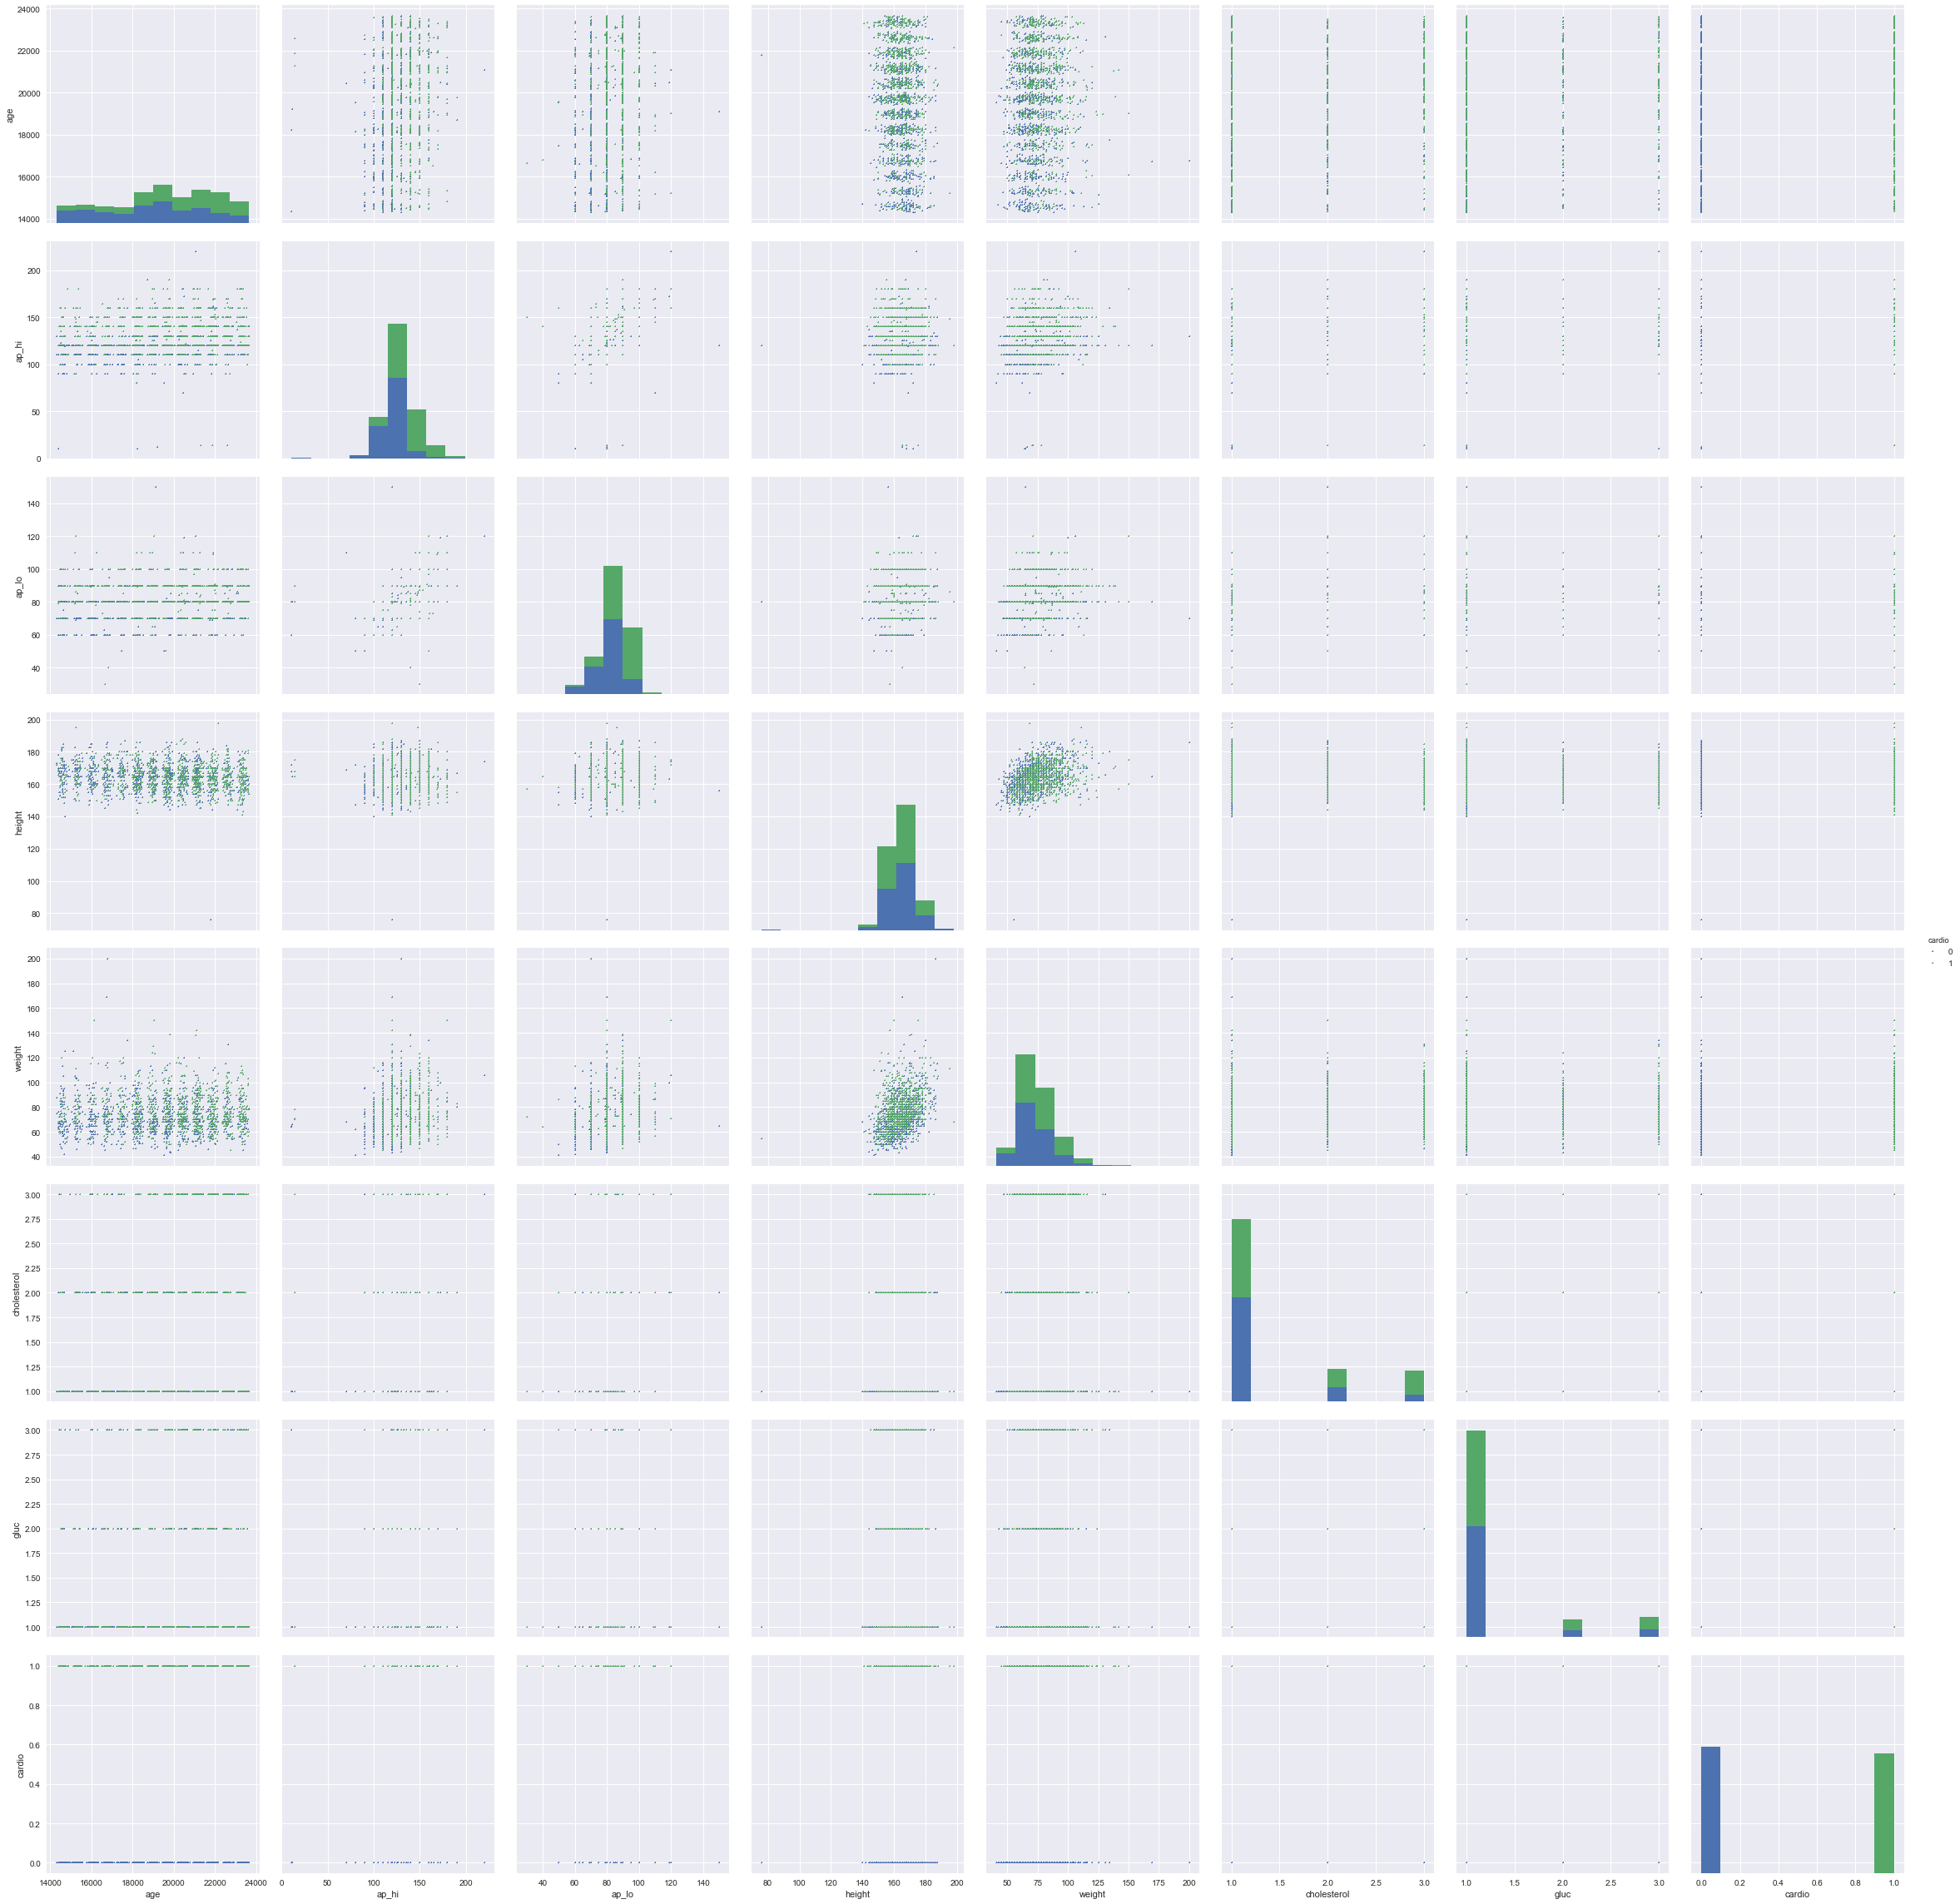

In [6]:
data = train.copy()
data['cardio'] = answer

data = data[data.ap_hi < 300]
data = data[data.ap_lo < 300]
data = data.head(2000)
sns.pairplot(data[['age', 'ap_hi', 'ap_lo', 'height', 'weight', 'cholesterol', 'gluc', 'cardio']], markers='+', hue='cardio', plot_kws={'s': 1}, size=4)

In [9]:
len(complete[complete.ap_hi > 240])

59